# 02 - Feature Engineering

Calcular novas features (compacidade, ratio length/width), PCA/LDA, tratamento de outliers etc.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import os

TRAIN_CSV = 'outputs/figures/predictions.csv'

df = pd.read_csv(os.path.abspath(TRAIN_CSV))
df['class_name'] = df['class'].map({1:'Kama',2:'Rosa',3:'Canadian'})
display(df.head())

,area,perimeter,compactness,length,width,asymmetry,groove,class,class_name,compactness_calc,ratio_length_width,prediction,class_name.1
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama,0.870756,1.740036,1,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama,0.880833,1.666367,1,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama,0.904524,1.585556,1,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama,0.894995,1.575614,1,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama,0.902631,1.588433,1,Kama


## Cálculo de Compacidade

,area,perimeter,compactness_calc
0,15.26,14.84,0.870756
1,14.88,14.57,0.880833
2,14.29,14.09,0.904524
3,13.84,13.94,0.894995
4,16.14,14.99,0.902631


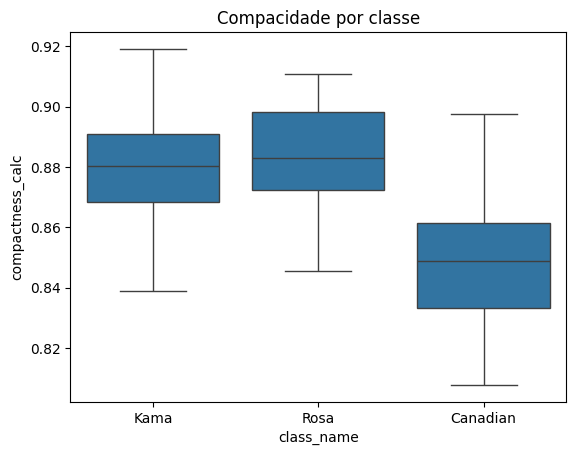

In [2]:
def calc_compactness(area, perimeter):
    return 4 * np.pi * area / (perimeter**2) if perimeter>0 else np.nan

df['compactness_calc'] = df.apply(lambda row: calc_compactness(row['area'], row['perimeter']), axis=1)
display(df[['area','perimeter','compactness_calc']].head())
import seaborn as sns
plt.figure()
sns.boxplot(x='class_name', y='compactness_calc', data=df)
plt.title('Compacidade por classe')
plt.show()

## Ratio length/width

,length,width,ratio_length_width
0,5.763,3.312,1.740036
1,5.554,3.333,1.666367
2,5.291,3.337,1.585556
3,5.324,3.379,1.575614
4,5.658,3.562,1.588433


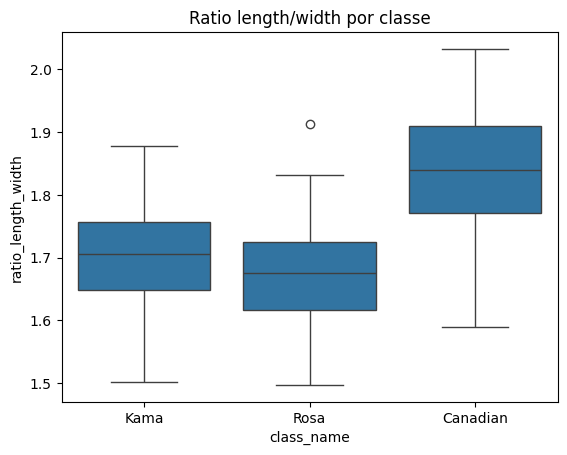

In [3]:
df['ratio_length_width'] = df['length'] / df['width'].replace({0: np.nan})
display(df[['length','width','ratio_length_width']].head())
plt.figure()
sns.boxplot(x='class_name', y='ratio_length_width', data=df)
plt.title('Ratio length/width por classe')
plt.show()

## PCA para Visualização

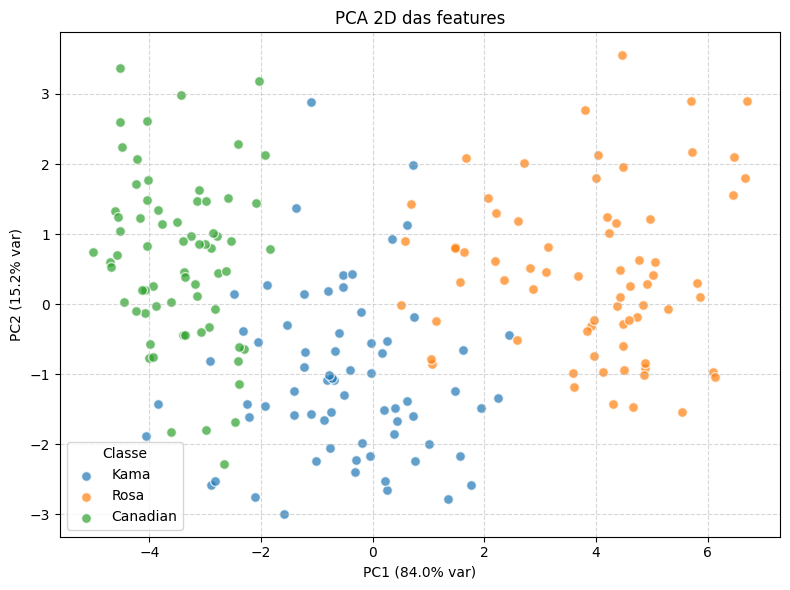

Variância explicada total (2 PCs): 0.993


In [6]:
features = ['area','perimeter','compactness_calc','length','width','asymmetry','groove','ratio_length_width']
X = df[features].dropna()
y = df.loc[X.index, 'class']

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(X_pca, columns=['pca1','pca2'], index=X.index)
df_pca['class'] = y.values

label_map = {1: 'Kama', 2: 'Rosa', 3: 'Canadian'}

plt.figure(figsize=(8,6))
for label, group in df_pca.groupby('class'):
    plt.scatter(group['pca1'], group['pca2'],
                label=label_map.get(label, str(label)),
                alpha=0.7, edgecolors='w', s=50)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.title('PCA 2D das features')
plt.legend(title="Classe")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print('Variância explicada total (2 PCs): {:.3f}'.format(pca.explained_variance_ratio_.sum()))

## LDA para Visualização

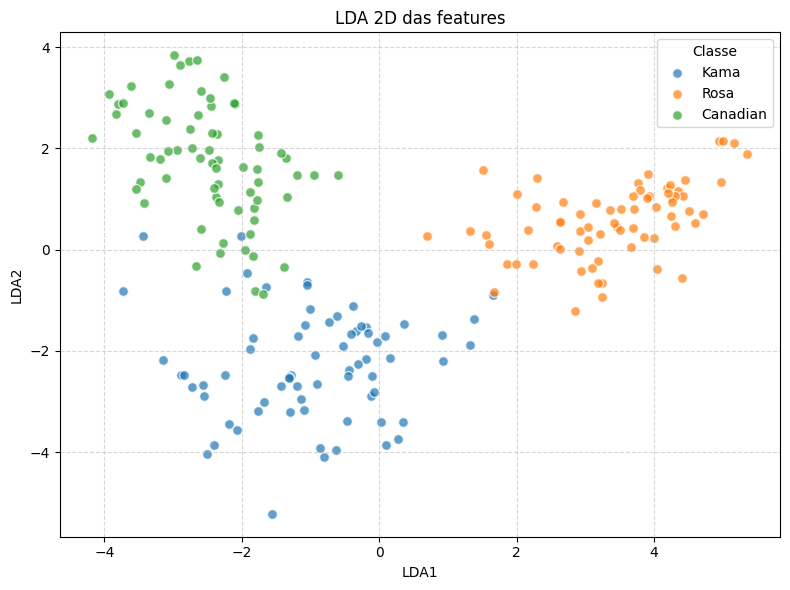

In [11]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)
df_lda = pd.DataFrame(X_lda, columns=['lda1','lda2'], index=X.index)
df_lda['class'] = y.values

label_map = {1: 'Kama', 2: 'Rosa', 3: 'Canadian'}

plt.figure(figsize=(8,6))
for label, group in df_lda.groupby('class'):
    plt.scatter(group['lda1'], group['lda2'],
                label=label_map.get(label, str(label)),
                alpha=0.7, edgecolors='w', s=50)
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.title('LDA 2D das features')
plt.legend(title="Classe")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()